In [ ]:
# Package needed to read csv file from Github
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tkinter import *

# Reads the raw data from the Github URL
df_mort = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_hr/mortality_timeseries_hr.csv')

def date(province_name, region_name):
    
    df_province = df_mort[df_mort.province == province_name]
    
    return df_province.date_death_report[df_province.health_region == region_name]
    

def r_avg(province_name, region_name):
    
    df_province = df_mort[df_mort.province == province_name]
    
    return df_province.deaths[df_province.health_region == region_name].rolling(window=7).mean()


def plot_values(province_name, region_name):
    
    return plt.plot(date(province_name, region_name),r_avg(province_name, region_name))


def plot(region_name, province_name):

    # Creates figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    plot_values(province_name, region_name)
    
    # Sets the title and labels for axes      
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Daily Mortality (7-day Rolling Average)', fontsize=10)
    plt.suptitle('Daily Reported Deaths in '+region_name, fontsize=15)

    # Sets ticks every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
 
    # Rotates and right aligns the x labels 
    fig.autofmt_xdate()
    
    return fig


province_name = input("Enter the name of your province: ")
if province_name == "Alberta":
    OptionList = ["Calgary","Central","Edmonton",
                  "North","Not Reported","South",]

elif province_name == "British Columbia":
    OptionList = ["Fraser","Interior","Island",
                  "Northern","Not Reported","Vancouver Coastal",]

elif province_name == "Manitoba":
    OptionList = ["Interlake-Eastern","Northern","Not Reported",
                  "Prairie Mountain","Southern Health","Winnipeg",]

elif province_name == "New Brunswick":
    OptionList = ["Not Reported","Zone 1 (Moncton area)","Zone 2 (Saint John area)",
                  "Zone 3 (Fredericton area)","Zone 4 (Edmundston area)",
                  "Zone 5 (Campbellton area)","Zone 6 (Bathurst area)","Zone 7 (Miramichi area)",]

elif province_name == "Newfoundland and Labrador":
    OptionList = ["Central","Eastern","Labrador-Grenfell",
                  "Not Reported","Western",]

elif province_name == "Nova Scotia":
    OptionList = ["Not Reported","Zone 1 - Western","Zone 2 - Northern",
                  "Zone 3 - Eastern","Zone 4 - Central",]

elif province_name == "Nunavut":
    OptionList = ["Nunavut",]
    
elif province_name == "Northwest Territories":
    OptionList = ["NWT",]

elif province_name == "Ontario":
    OptionList = ["Algoma","Brant","Chatham-Kent","Durham","Eastern","Grey Bruce","Haldimand-Norfolk", 
                  "Haliburton Kawartha Pineridge","Halton","Hamilton","Hastings Prince Edward",
                  "Huron Perth","Kingston Frontenac Lennox & Addington","Lambton",
                  "Leeds Grenville and Lanark","Middlesex-London","Niagara","North Bay Parry Sound",
                  "Northwestern","Not Reported","Ottawa","Peel","Peterborough","Porcupine",
                  "Renfrew","Simcoe Muskoka","Southwestern","Sudbury","Thunder Bay","Timiskaming",
                  "Toronto","Waterloo","Wellington Dufferin Guelph","Windsor-Essex","York",]

elif province_name == "Prince Edward Island":
    OptionList = ["Prince Edward Island",]
    
elif province_name == "Quebec":
    OptionList = ["Abitibi-Témiscamingue","Bas-Saint-Laurent","Capitale-Nationale",
                  "Chaudière-Appalaches","Côte-Nord","Estrie","Gaspésie-Îles-de-la-Madeleine",
                  "Lanaudière","Laurentides","Laval","Mauricie","Montérégie",
                  "Montréal","Nord-du-Québec","Not Reported","Nunavik",
                  "Outaouais","Saguenay","Terres-Cries-de-la-Baie-James",]

elif province_name == "Repatriated":
    OptionList = ["Not Reported",]
    
elif province_name == "Saskatchewan":
    OptionList = ["Central","Far North","North","Not Reported",
                  "Regina","Saskatoon","South",]

else:
    OptionList = ["Yukon",]

def selected(event):
    MyLabel = Label(win, text="The selected region is: "+clicked.get()).pack()   

# Creates the window
win = Tk()

# Sets size of the window
win.geometry("400x400")

# Sets title of the window
win.title("COVID-19 Mortality")

clicked = StringVar()
clicked.set(OptionList[0])

# Creates the Option Menu
dropmenu = OptionMenu(win, clicked, *OptionList,command=selected)
dropmenu.pack(padx=10,pady=20)

win.mainloop()

print("The name of your region is: "+clicked.get())
plot(clicked.get(), province_name)
plt.show()

In [ ]:
# Currently plots all weather data from 2017 till now
# Will change so that it only plots current data (for the current month)

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.dates as mdates

# Test values: 
# prov_id = 'AB'
# stat_id = '3031092' - Station ID for Calgary


prov_id = input("Province Abbr.: ")
stat_id = input("Station ID: ")

base_url = 'https://dd.weather.gc.ca/climate/observations/daily/csv/'
start_dt = date(2016,12,1)
end_dt = date.today() - timedelta(days=30)

delta = relativedelta(months=1)

while start_dt <= end_dt:
    start_dt += delta
   
    date_rang = start_dt.strftime("%Y-%m")
    
    target_url = base_url + prov_id + '/climate_daily_' + prov_id+ '_' +stat_id+ '_' +date_rang+ '_P1D.csv'
    weat_data =  pd.read_csv(target_url, encoding='Latin-1')
    
    weat_city = weat_data['Mean Temp (°C)']
    date_city = weat_data['Date/Time']

    # Creates figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    plt.plot(date_city, weat_city)
    
    # Sets the title and labels for axes      
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Mean Temp', fontsize=10)
    plt.suptitle('Daily Reported Temperature', fontsize=15)

    # Sets ticks every month
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
 
    # Rotates and right aligns the x labels 
    fig.autofmt_xdate()

plt.show()

In [ ]:
import tkinter as tk
from numpy import array

def select():
    title=var.get()
    print (title[0:10])


choices = [['Calgary',3031092],['Central',3025440],['Edmonton',3031092]]
Dic={'Calgary':0,'Central':1,'Edmonton':2}
GUI = tk.Tk()
var = tk.StringVar(GUI)
var.set('Calgary')
op=tk.OptionMenu(GUI, var, *Dic.keys())
op.pack(side='left',padx=20,pady=10)
bt=tk.Button(GUI,text='check value',command=select)
bt.pack(side='left',padx=20,pady=10)
GUI.mainloop()

Enter the name of your province: Alberta
The name of your region is: Calgary


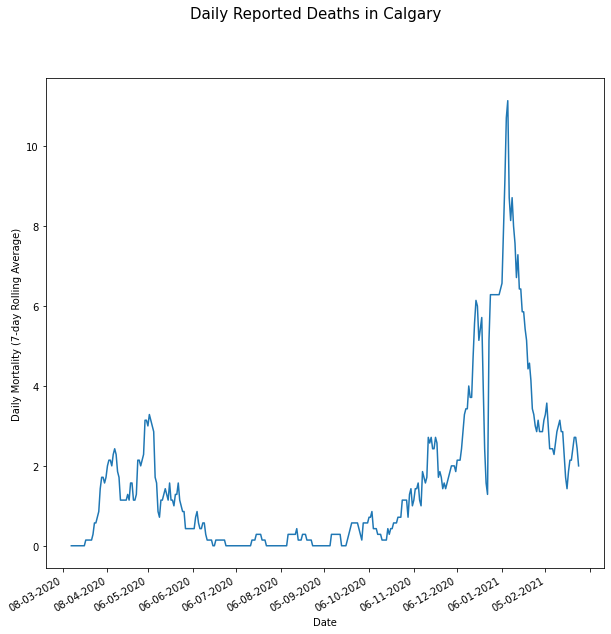

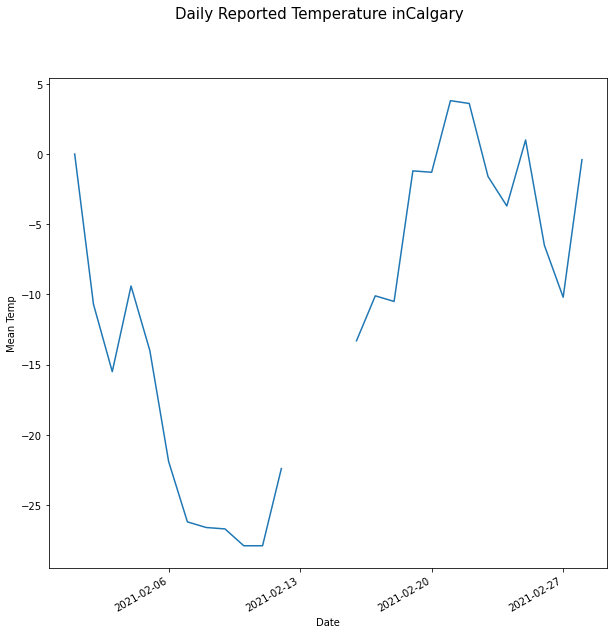

In [12]:
# Plots both mortality and weather (CURRENTLY ONLY FOR ALBERTA)
# Package needed to read csv file from Github
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tkinter import *
import datetime as dt

# Reads the raw data from the Github URL
df_mort = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_hr/mortality_timeseries_hr.csv')

def date(province_name, region_name):
    
    df_province = df_mort[df_mort.province == province_name]
    
    return df_province.date_death_report[df_province.health_region == region_name]
    

def r_avg(province_name, region_name):
    
    df_province = df_mort[df_mort.province == province_name]
    
    return df_province.deaths[df_province.health_region == region_name].rolling(window=7).mean()


def plot_values(province_name, region_name):
    
    return plt.plot(date(province_name, region_name),r_avg(province_name, region_name))


def plot(region_name, province_name):

    # Creates figure and plot space
    fig, ax = plt.subplots(figsize=(10, 10))

    plot_values(province_name, region_name)
    
    # Sets the title and labels for axes      
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Daily Mortality (7-day Rolling Average)', fontsize=10)
    plt.suptitle('Daily Reported Deaths in '+region_name, fontsize=15)

    # Sets ticks every month
    ax.xaxis.set_major_locator(mdates.MonthLocator())
 
    # Rotates and right aligns the x labels 
    fig.autofmt_xdate()
    
    return fig

province_name = input("Enter the name of your province: ")

def selected(event):
    MyLabel = Label(win, text="The selected region is: "+clicked.get()).pack()   

# Creates the window
win = Tk()

# Sets size of the window
win.geometry("400x400")

# Sets title of the window
win.title("COVID-19 Mortality")

clicked = StringVar()
clicked.set(OptionList[0])

# Creates the Option Menu
dropmenu = OptionMenu(win, clicked, *OptionList,command=selected)
dropmenu.pack(padx=10,pady=20)

if province_name == "Alberta":
    
    prov_id = 'AB'
    OptionList = ["Calgary","Central","Edmonton",
                  "North","Not Reported","South",]
    
    if clicked.get() == 'Calgary':
        stat_id = '3031092'
        city_name = 'Calgary'
        
    if clicked.get() == 'Central':
        stat_id = '3025440'
        city_name = 'Red Deer'
    
    if clicked.get() == 'Edmonton':
        stat_id = '3012195'
        city_name = 'Edmonton'
        
    if clicked.get() == 'North':
        stat_id = '3062693'
        city_name = 'Fort McMurray'
        
    if clicked.get() == 'South':
        stat_id = '3033879'
        city_name = 'Lethbridge'

win.mainloop()

print("The name of your region is: "+clicked.get())
plot(clicked.get(), province_name)
plt.show()

base_url = 'https://dd.weather.gc.ca/climate/observations/daily/csv/'

current_date = dt.datetime.today() - dt.timedelta(days=28)
date = current_date.strftime("%Y-%m")

target_url = base_url + prov_id + '/climate_daily_' + prov_id+ '_' +stat_id+ '_' +date+ '_P1D.csv'
weat_data =  pd.read_csv(target_url, encoding='Latin-1')

weat_city = weat_data['Mean Temp (°C)']
date_city = weat_data['Date/Time']

# Creates figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(date_city, weat_city)
    
# Sets the title and labels for axes      
plt.xlabel('Date', fontsize=10)
plt.ylabel('Mean Temp', fontsize=10)
plt.suptitle('Daily Reported Temperature in '+city_name, fontsize=15)

# Sets ticks every month
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
 
# Rotates and right aligns the x labels 
fig.autofmt_xdate()

plt.show()